In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
import sys


sys.path.append('../Numerical_methods')
from bachelor_funcs import Σ_initial, r_array, first_dev_matrix, get_1_dev_irr
from ODE_schemes import stencil_calc 
from scheme_calculator import *

# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 12}
mpl.rc('font', **font)

In [2]:
r_array, len(r_array)

(array([1.00000000e-02, 1.50000000e-02, 2.11237244e-02, ...,
        9.99273836e+03, 9.99773654e+03, 1.00027360e+04]),
 4001)

In [3]:
t = np.array([1, 3, 5, 6, 9])
t_d = np.diff(t)
t_d

array([2, 2, 1, 3])

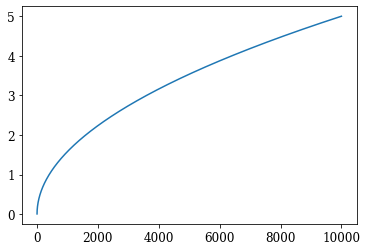

In [4]:
plt.plot(r_array[:-1], np.diff(r_array))

In [5]:
r_dev1 = get_1_dev_irr(np.sin(r_array))

In [6]:
first_dev_matrix[2,:8], first_dev_matrix[1,:8]

(array([  0.        , -63.74445522, -38.03667388, 117.21146511,
        -15.43033601,   0.        ,   0.        ,   0.        ]),
 array([-80.16792805, -37.97786686, 135.25490411, -17.10910919,
          0.        ,   0.        ,   0.        ,   0.        ]))

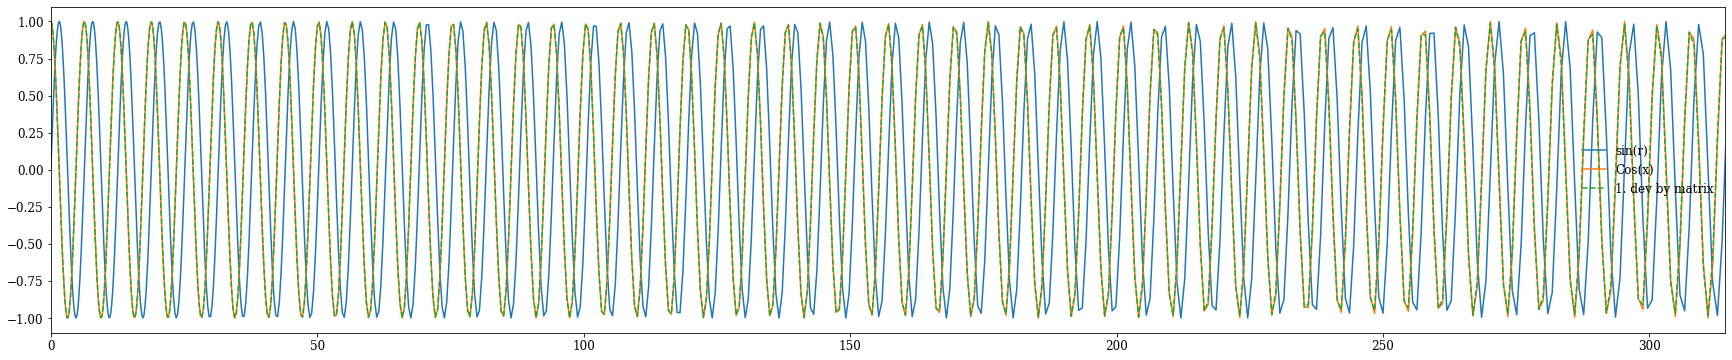

In [7]:
plt.figure(figsize=(30,6))
x = np.linspace(0, 100*np.pi)
plt.plot(r_array, np.sin(r_array), label='sin(r)')
#plt.plot(x, np.sin(x))
plt.plot(r_array, np.cos(r_array), label='Cos(x)')
plt.plot(r_array, r_dev1, ls='--', label = '1. dev by matrix')



plt.xlim(0, 100*np.pi)
plt.legend(frameon=False)

C:\Users\chris\AppData\Local\Temp/ipykernel_13080/2717816922.py:10: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,100)


(0.0, 500.0)

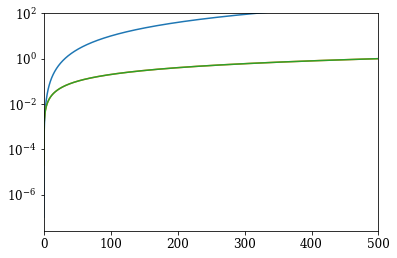

In [8]:
end = 30
func = lambda x: 1e-3*x**2
x2 = np.linspace(r_array[0], end, 1000)

plt.plot(r_array, func(r_array))
plt.plot(r_array, get_1_dev_irr(func(r_array)))
plt.plot(r_array, 2e-3*r_array)

plt.yscale('log')
plt.ylim(0,100)
plt.xlim(0, 500)

In [9]:
N = len(r_array)
s = 4

i1 = 0
i2 = s
A = np.zeros((N, N))
for i in range(N):
    if abs(i1 - i) >= s/2 and i2 < N:
        i1 += 1
        i2 += 1

    stencil = r_array[i1:i2] - r_array[i]
    coeff = stencil_calc(stencil, 1)
    A[i, i1:i2] = coeff

In [10]:
Δr = np.diff(r_array)
r_ghost = np.concatenate((np.array([r_array[0] - Δr[0]]), r_array, np.array([r_array[-1] + Δr[-1]])))
r_array

array([1.00000000e-02, 1.50000000e-02, 2.11237244e-02, ...,
       9.99273836e+03, 9.99773654e+03, 1.00027360e+04])

In [11]:
N = len(r_ghost)
s = 4

i1 = 0
i2 = s
A_ghost = np.zeros((N, N))
for i in range(N):
    if abs(i1 - i) >= s/2 and i2 < N:
        i1 += 1
        i2 += 1

    stencil = r_ghost[i1:i2] - r_ghost[i]
    coeff = stencil_calc(stencil, 1)
    A_ghost[i, i1:i2] = coeff
A_ghost[0] = 0
A_ghost[0, 0] = 1
A_ghost[-1] = 0
A_ghost[-1, -1] = 1
sA_ghost = csr_matrix(A_ghost.copy())


In [12]:
np.diff(r_ghost)

array([0.005     , 0.005     , 0.00612372, ..., 4.99818426, 4.9994341 ,
       4.9994341 ])

In [23]:
r_in = 0.01 # AU
r_out = 1e4 # AU 
r = r_in
r_list = [r]
r_sensitive = 2e-1
while r < r_out:
    if r <= r_sensitive:
        Δr = 5e-3 * np.sqrt(r)
    else: 
        Δr = 5e-2 * np.sqrt(r)
    r = r + Δr
    r_list.append(r)
r = np.asarray(r_list)   

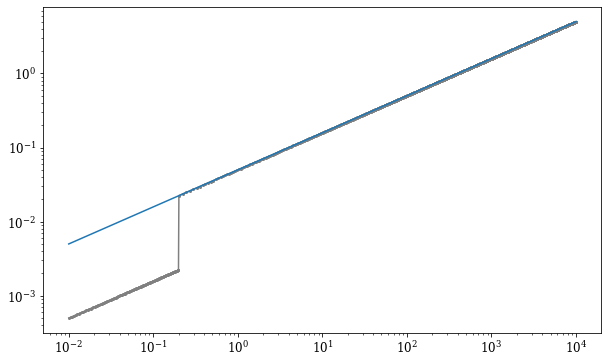

In [26]:
fig, axs = plt.subplots(figsize = (10,6))

axs.loglog(r[:-1], np.diff(r), ls = '-', marker = 'o', c = 'grey', label='Δr', ms=2)
axs.loglog(r_array[:-1], np.diff(r_array))

In [21]:
r_array

array([1.00000000e-02, 1.50000000e-02, 2.11237244e-02, ...,
       9.99273836e+03, 9.99773654e+03, 1.00027360e+04])